<img src="img/dsci511_header.png" width="600">

# Lecture 5: Numpy

## Lecture Learning Objectives

- Explain what a NumPy array is, and why it is useful in data science.
- Explain the relationship and differences between `numpy.ndarray`, `pandas.Series` and `pandas.DataFrame` objects in Python.
- Use NumPy to create arrays with Numpy functions including `numpy.array()`, `numpy.arange()`, `numpy.linspace()` and `numpy.full()`, `numpy.zeros()` and `numpy.random.rand()`
- Perform mathematical operations on and with arrays, like `+`, `-`, `*`, `**` on numeric values
- Use NumPy math functions like `numpy.sum()`, `numpy.mean()`, `numpy.min()`, `numpy.max()`, `numpy.log()` as stand-alone functions or as methods of numpy arrays (when available)
- Be able to access values from a NumPy array by numeric indexing and slicing and boolean indexing
- Explain what broadcasting is and how to use it.
- Reshape arrays by adding/removing/reshaping axes with `numpy.transpose()`, `numpy.reshape()`, `numpy.ravel()`, `numpy.flatten()`

## What is NumPy

**NumPy -> “Numerical Python extensions”.**

NumPy offers:
- Arrays
- Mathematical Constants
- Mathematical Functions

The name NumPy is derived from **“Numerical Python extensions”.**

NumPy is a Python library used primarily for computing involving numbers. It is especially useful as it provides a multidimensional array object, called an **array**. In addition, NumPy also offers numerous other mathematical functions used in the domain of Linear Algebra and Calculus. NumPy is written in C, making NumPy arrays faster and more memory efficient than Python lists, read more [here](https://www.labri.fr/perso/nrougier/from-python-to-numpy/)). The Numpy docs are excellent: <https://numpy.org/doc/stable/index.html>

#### Almost everything in scientific Python relies on NumPy  

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig2_HTML.png?as=webp" width=500>

*__Source__: Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). https://doi.org/10.1038/s41586-020-2649-2*

## NumPy arrays

- "n-dimensional" data structures called `ndarray`s, which must be rectilinear 
- Can contain all the basic `dtype`s, e.g., floats, integers, strings etc, but work best with numeric data
- Generally homogeneous, meaning that items in the array should be of the same type. Type coercion usually happens when creating an array from mixed types.
- Are vectorized (apply operations (like addition, subtraction, multiplication, etc.) over an entire array without needing to explicitly write loops)
- Compatible with NumPy's vast collection of built-in functions

<img src="img/numpy_arrays.png" width=400>

*__Source:__ [Medium.com](https://medium.com/hackernoon/10-machine-learning-data-science-and-deep-learning-courses-for-programmers-7edc56078cde)*

#### Why is it important to have the same `dtype`?

- We can allocate memory in advance knowing that all items are the same `dtype`
- Items are stored in contiguous block of memory

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png" width=600>

*__Source:__ https://jakevdp.github.io/PythonDataScienceHandbook/*

### Our first array:

We can make arrays in many ways, but we'll create our first one from a list:

In [1]:
import numpy as np

In [2]:
my_list = [1, 2, 3, 4, 5]
my_list

[1, 2, 3, 4, 5]

In [3]:
import numpy as np

my_array = np.array([1, 2, 3, 4, 5])
my_array

array([1, 2, 3, 4, 5])

We can learn things about our array from functions and attributes we have met before:

In [4]:
type(my_array)

numpy.ndarray

In [5]:
my_array.dtype

dtype('int64')

In [6]:
my_array.shape # elements in each dimension

(5,)

In [7]:
my_array.size # elements in total

5

And because they can come in $n$ dimensions, we also sometimes want to use `numpy.ndim`

In [8]:
my_array.ndim

1

And we can use numerical subsetting to get elements back from our array:

In [9]:
my_array[2:4]

array([3, 4])

### What is vectorization?

Vectorization is the ability to operate on objects with multiple elements in an element-wise fashion, without loops.

Here's an example where because `numpy.ndarray`s are vectorized we can add 5 to each element using `+`. 

In [10]:
my_array + 5

array([ 6,  7,  8,  9, 10])

In contrast, to add 5 to every element in a list, we need to iterate over every item with a loop:

In [11]:
my_list + 5 # throws an error

TypeError: can only concatenate list (not "int") to list

In [12]:
for i in range(len(my_list)):
    my_list[i] = my_list[i] + 5
my_list    

[6, 7, 8, 9, 10]

### Relationship to Pandas

- NumPy `ndarray` are the object that Pandas `Series` objects are built on top of.
- The elements/values in a `Series` are actually represented as an `ndarray` in memory.
- Pandas `Series` objects have an attribute called an index that is used to label and access its elements. NumPy `ndarray`s do not have an index and instead can only be accessed by numerical subsetting.
- We can easily convert a NumPy `ndarray` to Pandas `Series` object via `pandas.Series()`, and we can covert a Pandas `Series` to a a NumPy `ndarray` via `pandas.Series.to_numpy()`

<img src="img/numpy-series.png" width=375>

In [13]:
my_array

array([1, 2, 3, 4, 5])

In [14]:
import pandas as pd

my_series = pd.Series(my_array)
my_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [15]:
my_array_from_series = my_series.to_numpy()
my_array_from_series

array([1, 2, 3, 4, 5])

## Creating `ndarray`s

`ndarray`s are typically created using two main methods:
- From existing data (usually lists or tuples) using `numpy.array()`, like we saw above; or,
- Using other Numpy functions such as `numpy.arange()`, `numpy.linspace()`, `numpy.zeros()`, etc.

#### From existing data

Here we take two lists to create a 2D `ndarray` (of DNA sequences that correspond to amino acid codons):

In [16]:
codons = np.array([["ttt", "ttc", "ttaere", "ttg"],
        ["ctt", "ctc", "cta", "ctg"]])
codons

array([['ttt', 'ttc', 'ttaere', 'ttg'],
       ['ctt', 'ctc', 'cta', 'ctg']], dtype='<U6')

> Note: See the `[[` in the `codons` `ndarray` we created above? In the print output of `ndarray`s, each `[` indicates one dimension. So for the `codons` `ndarray` we can read that as it being a 2D array because there are two `[`'s in the print output for that object.

## From other Numpy functions

Here we use `numpy.arrange()` to create an 1D `ndarray` with the values from 2 - 10, skip counting by 2's:

In [17]:
np.arange(0, 11, 2)

array([ 0,  2,  4,  6,  8, 10])

There are many, many, maaaaaaaaannnnnny Numpy functions we can use to create `ndarray`s in useful ways. We summarise some with think will be most important to you below in this table, and each function is linked to its official Numpy documentation so you can learn more and view examples.

#### Functions for creating `ndarray`s

| Numpy function | Description |
|----------------|-------------|
| [`numpy.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) | Returns an `ndarray` with evenly spaced values within a given interval, given a start, stop and step-size. | 
| [`numpy.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) | Returns an `ndarray` with evenly spaced numbers over a specified interval, given a start, stop and number of steps. |
| [`numpy.full()`](https://numpy.org/doc/stable/reference/generated/numpy.full.html) | Returns an `ndarray` of a given shape and type, filled with fill_value. |
| [`numpy.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)| Returns an `ndarray` of a given shape and type, filled with zeros. |
| [`numpy.random.rand()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) | Returns an `ndarray` of random values in a given shape. |

## Mathematical operations with `ndarray`s

As mentioned in the introduction, `ndarray`s are vectorized. This means that we can do element-wise operations on them without having to write `for` loops. Our element-wise operations can be an operation applied to each element of an array or can be between the paired entries of two (or more) arrays.

### Mathematical operators

We can use the standard Python math operators (e.g., `+`, `-`, `*`, `**`) to do math on `ndarray`s. 

Here we create an array, `x` and then use the `+` operator to create a new `ndarray` named `y` with the value of 1 added to all the elements in `x`:

In [18]:
x = np.full(5, 4)
x

array([4, 4, 4, 4, 4])

In [19]:
y = x + 1
y

array([5, 5, 5, 5, 5])

Here we add `x` and `y` together, element-by-element:

In [20]:
x * y

array([20, 20, 20, 20, 20])

This is also true for the Python operators that work on strings!

In [21]:
firsts = np.array(["Florence", "Ada", "Gertrude"])
space = np.array([" "])
lasts = np.array(["Nightingale", "Lovelace", "Cox"])

firsts + space + lasts

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U1')) -> None

### Mathematical Numpy functions

As in `ndarray` creating, there are many, many, maaaaaaaaannnnnny Numpy functions we can use to perform mathematical operations. All functions work element-wise, but some return an `ndarray` single value when applied to an `ndarray` (e.g., `numpy.sum()`), while others return an `ndarray` of the same size the function was applied to (`numpy.log()`). Be sure to check the documentation for each function you use so you understand how it should be applied and what shape of object it will return. 

Below we demonstrate how to use  `numpy.sum()` and `numpy.log()` on 2D arrays, and then we summarise some additional mathematical Numpy functions with think will be most important to you in table following the demonstrations. Again, each function is linked to its official Numpy documentation so you can learn more and view examples.

Creating a 2D array:

In [22]:
measurements = np.array([[2.5, 3.5, 2],
          [10, 20, 30]])
measurements

array([[ 2.5,  3.5,  2. ],
       [10. , 20. , 30. ]])

In [23]:
measurements.shape

(2, 3)

In [24]:
measurements.ndim

2

### `np.sum()`

If we want to get the sum of the entire `ndarray` (use default for `axis`, which is `None`):

In [25]:
total_sum_measurements = np.sum(measurements)
total_sum_measurements

68.0

In [26]:
measurements

array([[ 2.5,  3.5,  2. ],
       [10. , 20. , 30. ]])

If we want to get the sum of axis 1:

In [27]:
col_sums_measurements = np.sum(measurements, axis=1)
col_sums_measurements

array([ 8., 60.])

In [28]:
np.sum(measurements, axis=0)

array([12.5, 23.5, 32. ])

### `np.log()`

If we want to log transform every element in the `ndarray`:

In [29]:
log_measurements = np.log(measurements)
log_measurements

array([[0.91629073, 1.25276297, 0.69314718],
       [2.30258509, 2.99573227, 3.40119738]])

#### Mathematical functions for `ndarray`s

Below are some key mathematical functions for `ndarray`s. This is NOT an exhaustive list, you can find an exhaustive list here in the Numpy docs: <https://numpy.org/doc/stable/reference/routines.math.html>

| Numpy function | Description |
|----------------|-------------|
| [`numpy.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) | Sum of array elements over a given axis. | 
| [`numpy.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean) | Returns the average of the array elements. The average is taken over the flattened array by default, otherwise over the specified axis. float64 intermediate and return values are used for integer inputs. |
| [`numpy.min()`](https://numpy.org/doc/stable/reference/generated/numpy.min.html) | Return the minimum of an array or minimum along an axis. |
| [`numpy.max()`](https://numpy.org/doc/stable/reference/generated/numpy.max.html)| Return the maximum of an array or maximum along an axis. |
| [`numpy.log()`](https://numpy.org/doc/stable/reference/generated/numpy.log.html) | The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.|

## Indexing and slicing `ndarray`s

Indexing and slicing `ndarray`s must be done using numerical or boolean indexing because arrays do not have indices or column labels. 

Numerical indexing is of `ndarray`s is similar to what you have seen for other objects in Python. The new challenge comes however from doing this in higher dimensions, which `ndarrays` can come it! Let's practice slicing 3D `ndarray`s so we can get the hang of it.

Let's create a 3 x 3 `ndarray` that would be like this cube:

<img src="img/3d-cube.png" width=400>

In [30]:
np.full((4, 3, 2), 1)

array([[[1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1],
        [1, 1]]])

In [31]:
cube_3_3 = np.array(
    [[[1, 2, 3],
      [1, 2, 3],
      [1, 2, 3]],
     [[1, 2, 3],
      [1, 2, 3],
      [1, 2, 3]],
     [[1, 2, 3],
      [1, 2, 3],
      [1, 2, 3]]]
)
cube_3_3

array([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]])

In [32]:
cube_3_3[1,1,0]

1

In [33]:
cube_3_3.shape

(3, 3, 3)

### Getting a single element from a 3D `ndarray`:

If we want to get the middle value, on the front face of the cube, as highlighted in the picture below (and should be `1`), we need to give the following numerical indices for the three axes:
- axis 0 = `1`
- axis 1 = `1`
- axis 2 = `0`

<img src="img/3d-cube-middle-front.png" width=400>

In [34]:
cube_3_3[1, 1, 0]

1

### Getting all the elements from one row from a particular dimension

If we want to get the top row, at the back of the cube as highlighted in the picture below (and should be `3, 3, 3`), we need to give the following numerical indices for the three axes:

- axis 0 = `0`
- axis 1 = `0:2` or `:`
- axis 2 = `2`

<img src="img/3d-cube-top-back-row.png" width=400>

In [35]:
cube_3_3[0, :, 2]

array([3, 3, 3])

### Getting a slice of an entire dimension

If we want to get a slice of an entire dimension of the cube as highlighted in the picture below (and should be comprised of nine 1's as a 3 x 3 shape in 2D), we need to give the following numerical indices for the three axes:

- axis 0 = `0:2` or `:`
- axis 1 = `0:2` or `:`
- axis 2 = `0`

<img src="img/3d-cube-entire-dim.png" width=400>

In [36]:
cube_3_3[:, :, 0]

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

## Boolean indexing `ndarray`s

As mentioned above, we can also use boolean indexing to subset `ndarray`s. This works in a similar way to what we have seen of other objects in Python. We'll look at a couple examples here to refresh and remind ourselves.

#### Returning values above or below a threshold

If we have an `ndarray` from which we want to subset values above or below a threshold, we can use comparison operators and square bracket notation to do this. In the example below, we have a mix of postive and negative numbers. We can use the threshold of 0 and the comparison operator `>` to subset and obtain only the positive values from the temperature measurements listed below:

In [37]:
temps = np.array([0, 3.5, -9999, 9.3, -9999, -9999, 2.7])
temps

array([ 0.000e+00,  3.500e+00, -9.999e+03,  9.300e+00, -9.999e+03,
       -9.999e+03,  2.700e+00])

In [38]:
postive_temps = temps[temps > 0]
postive_temps

array([3.5, 9.3, 2.7])

Sometimes we don't want to subset, but instead replace values. For example `-9999` is often used to represent a missing value, and working with such data numerically in Python, it might be better to encode it as a `nan`. To do this we use boolean indexing to subset values based on a condition and then use the `=` sign to assign a new value selectively to those which were subset:

In [39]:
temps_nans = temps
temps_nans[temps_nans < 0] = np.nan

In [40]:
temps_nans

array([0. , 3.5, nan, 9.3, nan, nan, 2.7])

## Broadcasting

Numpy `ndarray`'s with different sizes cannot be directly used together in mathematical operations. When we try to do something like that Numpy intentionally returns an error. This Numpy feature helps minimize mathematical errors in code.

For example, we get a `ValueError` when we try to add two 1D `ndarray`s of different lengths:

In [41]:
fives = np.array([5, 5, 5])
tens = np.array([10, 10, 10, 10, 10, 10])
fives + tens

ValueError: operands could not be broadcast together with shapes (3,) (6,) 

However, you might then wonder why this works:

In [42]:
five = np.array([5])
tens = np.array([10, 10, 10, 10, 10, 10])
five + tens

array([15, 15, 15, 15, 15, 15])

Or this:

In [43]:
fives = np.array([5, 5, 5])
two_tens = np.array([[10, 10, 10], 
                 [10, 10, 10]])
fives + two_tens

array([[15, 15, 15],
       [15, 15, 15]])

In NumPy the smaller array is “broadcast” across the larger array so that they have compatible shapes. Why should you care about broadcasting?
- Well, it's cleaner and faster than looping
- It also affects the array shapes resulting from arithmetic operations

The figure below shows more examples where this can happen.

<img src="img/broadcasting.png" width=600>

Source: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas (2016)

**Caution!!** Arrays can only be broadcast together if they are compatible in all dimensions. Dimensions are compatible if:
    - **they are equal**, or
    - **one of them is 1**.
    
NumPy checks for dimensional compatibility by starting from the right-most dimension. Consider these two examples from NumPy's documentation:
  
```
Broadcastable:
A      (3d array): 256 x 256 x 3
B      (1d array):             3
Result (3d array): 256 x 256 x 3

A      (4d array): 8 x 1 x 6 x 1
B      (3d array):     7 x 1 x 5
Result (4d array): 8 x 7 x 6 x 5
```

We've provided some code below to test out array compatibility:

In [44]:
a = np.ones((3, 2, 1, 6))
a

array([[[[1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.]]]])

In [45]:
b = np.ones((1, 2, 7))
print("The shape of a is:" + f"{a.shape}".rjust(10))
print("The shape of b is:" + f"{b.shape}".rjust(10))
print("")
try:
    print(f"The shape of a + b is: {(a + b).shape}")
except:
    print(f"ERROR: arrays are NOT broadcast compatible!")

The shape of a is:(3, 2, 1, 6)
The shape of b is: (1, 2, 7)

ERROR: arrays are NOT broadcast compatible!


## Reshaping `ndarray`s

Sometimes you will need to reshape `ndarray`s in your work. There are three useful functions for doing this that we will discuss, which we list to in the table below. There are many many maaaaannnny more array manipulation routines than just these, and you can find an exhaustive list in the Numpy docs: <https://numpy.org/doc/stable/reference/routines.array-manipulation.html>

| Numpy Function | Description |
|----------------|-------------|
| [`numpy.transpose()`](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)  | Returns an array with axes transposed. |
| [`numpy.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) | Gives a new shape to an array without changing its data. |
| [`numpy.flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) | Return a copy of the array collapsed into one dimension. |


### `numpy.transpose()`

`numpy.transpose()` works to returns an array with axes transposed. This can be useful in math as well as in image manipulation (more on this in later courses). Below is an example:

In [46]:
capital_t = np.array([[1, 1, 1],
                      [0, 1, 0],
                      [0, 1, 0]])
capital_t

array([[1, 1, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [47]:
capital_t_transpose = np.transpose(capital_t)
capital_t_transpose

array([[1, 0, 0],
       [1, 1, 1],
       [1, 0, 0]])

### `numpy.reshape()`

`numpy.reshape()` works to give a new shape to an array without changing its data. The function requires an `ndarray` and a shape (which must be compatible with the intial shape). 

The default order for reshaping is row-major (C-like index order). You can set `order='F'` to get a column-major (Fortran-like index order) reshaping. The following image illustrates this point:

<img src="img/row_column_major.png" width=200>

*__Source:__ https://en.wikipedia.org/wiki/Row-_and_column-major_order*

Let's take a tractable example, where we create a 4 x 3 array that is a sequence from 1-12 and then reshape it to a 6 x 2 array:

In [48]:
seq = np.array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [10, 11, 12]])
seq

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [49]:
row_major = np.reshape(seq, (6, 2))
row_major

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

Let's compare this to the column order:

In [50]:
column_major = np.reshape(seq, (6, 2), order='F')
column_major

array([[ 1,  8],
       [ 4, 11],
       [ 7,  3],
       [10,  6],
       [ 2,  9],
       [ 5, 12]])

### `numpy.ndarray.flatten()`

`numpy.ndarray.flatten()` works to return a **copy** of the array collapsed into one dimension. It is import to note that this is a method and so must be used by typing `.flatten()` following the name of the array you would like to apply it to (most of the others in this lecture have been functions). There is a related function [`numpy.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel) which works similarly but only returns a copy is necessary. 

Below we show an example of using `numpy.ndarray.flatten()` on the two arrays we worked with above (`seq` and `capital_t`):

In [51]:
seq

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [52]:
seq.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [53]:
capital_t

array([[1, 1, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [54]:
capital_t.flatten()

array([1, 1, 1, 0, 1, 0, 0, 1, 0])

## Appendix (OPTIONAL)

In this appendix, I'll show more about how NumPy manages and stores arrays in memory. **This is completely optional material**. I'll stress that a thorough understanding of the NumPy internals like how memory is handled and accessed is really more for developers working on super-optimized algorithms or for those interested in these kinds of things. The data scientist who does not care about these implementation details can just continue to visualize and use arrays as N-dimensional data structures—after all, the point of NumPy is to abstract away the technical implementation details so such users can focus on writing code and wrangling data.

This appendix draws on excellent material presented in:
- [The NumPy documentation](https://numpy.org/doc/stable/reference/internals.html)
- [Guide to NumPy](https://web.mit.edu/dvp/Public/numpybook.pdf) by Travis Oliphant, 2006

### Array data type

All ndarrays are homogeneous, meaning that every element has the exact same data-type (e.g., integer, float, string, etc) which takes up the exact same amount of memory.

For example, consider the following 1d-array which is full of 8-bit integers (`int8`):

In [55]:
a = np.array([1, 2, 3, 4, 5, 6], dtype='int8')
a

array([1, 2, 3, 4, 5, 6], dtype=int8)

One byte is equal to eight bits ([refresh yourself on bits and bytes here](https://web.stanford.edu/class/cs101/bits-bytes.html)), so for this array of `int8` data-types, we would expect each element to take up one byte. We can confirm using:

In [56]:
a.itemsize

1

> An aside on the difference between e.g., `int8`, `int16`, `int32`. The number here refers to the number of bits used to represent each integer. For example, `int8` is an integer represented with one byte (one byte = 8 bits). Recall that bits (i.e., 0s and 1s) are the basic units of information used by computers. So the maximum *unsigned* number that can be held with an `int8` datatype is: $2^8=256$. If we wish to have negative numbers, we need to use one of those bits to represent the sign, and we are left with $2^7$ bits to make numbers with, and so the signed range of `int8` is -128 to +127. Likewise, `int16` has an unsigned range of 0 to 65,535 ($2^{16}$), or a signed range of -32,768 to +32,767, etc. It's interesting to watch what happens if you try to use a dtype that does not support the number you wish to store:

In [57]:
np.array([126, 127, 128, 129, 130, 131, 132], dtype='int8')

/var/folders/j_/rfl72ddx1tz52j5wkbd8dc3w0000gn/T/ipykernel_8584/2454158965.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 128 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([126, 127, 128, 129, 130, 131, 132], dtype='int8')
/var/folders/j_/rfl72ddx1tz52j5wkbd8dc3w0000gn/T/ipykernel_8584/2454158965.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 129 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([126, 127, 128, 129, 130, 131, 132], dtype='int8')
/var/folders/j_/rfl72ddx1tz52j5wkbd8dc3w0000gn/T/ipykernel_8584/2454158965.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Pyt

array([ 126,  127, -128, -127, -126, -125, -124], dtype=int8)

>Above, notice how when we exceeded the integer 127 (the max of the `int8` signed range), NumPy automatically represents this number by counting up from the minimum of the signed range (-128). Of course, this wouldn't be a problem if we used `int16`:

In [58]:
np.array([126, 127, 128, 129, 130, 131, 132], dtype='int16')

array([126, 127, 128, 129, 130, 131, 132], dtype=int16)

Finally I'll say that technically it is possible to have mixed data-types in an array (i.e., a heterogenous array), but in this case, the array still "sees" each element as the same thing: a reference to some Python object, and the dtype would be "object".

In [59]:
a = np.array([['a', 'b', 'c'], 1, 3.14159], dtype='object')
a

array([list(['a', 'b', 'c']), 1, 3.14159], dtype=object)

Above is an ndarrays of objects, each one being a reference to some other Python object with its own data-type:

In [60]:
list(map(type, a))

[list, int, float]

Using arrays like this negates much of the optimized functionality that comes with them, and I can't recall a time when I've used a "heterogenous array". For mixed data-types, I would typically use other structures like lists or dictionaries.

### Memory layout & strides

Now that we've covered the basic concepts of ndarrays, we can talk more about how arrays are represented in memory. An ndarray is stored as a single “chunk” of memory starting at some location. It's helpful to think of it as a one-dimensional sequence in memory but with "fancy indexing" that can help map an N-dimensional index (for ndarrays) into that one-dimensional representation.

Consider "**Panel a**" in the below conceptual figure from the paper [Array programming with NumPy](https://www.nature.com/articles/s41586-020-2649-2), showing how a 2d-array of data-type `int64` (8 bytes) is represented in memory as a single chunk:

![](img/numpy_paper.png)

That word **strides** (stride means "one long step") is the number of bytes you need to step in each dimension when traversing the array. As you can see in the example, the **stride** information is particularly important for mapping the chunk of memory back to a n-dimensional array structure. So in the above case, the strides is `(24, 8)` meaning 24 bytes (three 8-byte `int64` elements) and 8 bytes (one 8-byte `int64` element), meaning that every 3 elements we increment our first dimension (i.e., move to the next row) and every 1 element we increment our second dimension (i.e., move to the next column).

Let's go through another example:

In [61]:
a = np.array([[1, 2], [3, 4], [5, 6]], dtype='int16')
a

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int16)

Here we have an ndarray of shape `(3, 2)` and with a dtype of `int16` (2 bytes per element in the array). We would expect the stride to be `(4, 2)` (every 4 bytes, which is 2 elements here for `int16`, we begin a new row, and every 2 bytes, which is 1 element here, we begin a new column). We can confirm with:

In [62]:
a.strides

(4, 2)

Neat! We could actually change how our ndarray maps from the memory block back to the ndarray by changing the stride information:

In [63]:
a.strides = (2, 4)
a

array([[1, 3],
       [2, 4],
       [3, 5]], dtype=int16)

To further drive the point home, what do you expect the strides to be of a 1D array? In that case, there is only one dimension to traverse, so we'd expect the strides to just be the number of bytes of 1 element, `(2,)` (i.e., every 2 bytes, which is one `int16` element). Let's confirm:

In [64]:
a = a.flatten()
a

array([1, 3, 2, 4, 3, 5], dtype=int16)

In [65]:
a.strides

(2,)

Finally, let's look at the strides of the following 3D array of size `(3,3,2)` but with the data-type `int8` (so that 1 byte = 1 element which makes interpreting strides a little easier). Visualizing 3D arrays starts to get a bit tricker, but I think of them as matrices stacked together like slices in a loaf of bread, or multiple chessboards stacked on top of each other.

In [66]:
a = np.arange(18, dtype='int8').reshape(3, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]]], dtype=int8)

In [67]:
a.strides

(6, 2, 1)

Now things are getting a little more confusing! The above is saying that every 6 elements we increment a "depth dimension", every 2 elements we increment a "row dimension" and every 1 element we increment a "column dimension". Using our chessboard analogy, every 6 elements in memory we move to the next chessboard in the stack, every 2 elements we move down one row of a chessboard and every element we move across 1 column of our chessboard. I'll talk more about this 3D example in the next section.

### Why do we care?

#### Reshaping

One sometimes-confusing topic in NumPy is understanding how ndarrays are reshaped. But now that you understand how ndarrays are represented in memory, you can better understand how reshaping works in NumPy too! Basically, you can think of reshaping as viewing that "chunk" of memory in a different way (reading it into a different shape but preserving the ordering of the data in memory). Consider the same 2D array we just saw earlier, but with the data-type `int8` (so that 1 byte = 1 element which makes interpreting strides a little easier):

In [68]:
a = np.array([[1, 2], [3, 4], [5, 6]], dtype='int8')
a

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int8)

In [69]:
a.strides

(2, 1)

When we reshape the array, think of it as flattening the array out:

In [70]:
a.flatten()

array([1, 2, 3, 4, 5, 6], dtype=int8)

And then reading that data back into a different shape with different strides. Below I'll change the shape to be `(2, 3)`, which means that we'll need strides of `(3, 1)` (every 3 elements, increment a row, every 1 element, increment a column in the array).

In [71]:
a.shape = (2, 3)
a.strides = (3, 1)
a

array([[1, 2, 3],
       [4, 5, 6]], dtype=int8)

> Above, I didn't need to do `a.strides`. When I changed the shape to `(2, 3)`, NumPy already took care of changing the strides for me, but I'm showing it for demonstration purposes.

The same logic applies to reshaping ndarrays of more than 2 dimensions. For example:

In [72]:
a = np.arange(18, dtype='int8')
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int8)

In [73]:
a = a.reshape(3, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]]], dtype=int8)

In [74]:
a.strides

(6, 2, 1)

In the above example, we have three 2D matrix stacked together (I'll call them "slices"). We use the first 6 elements of our flattened array to fill in the first "slice", and within that 2D slice, those elements are arranged in rows and columns dictated by the strides (i.e., every 2 elements increment a row and every 1 element increment a column). Once we've used the first 6 elements, we traverse a dimensional "slice" and use the next 6 element to fill that 2D slice. We then repeat that one more time for the last "slice".

You might be wondering two things at this point:

1. Why is our array above composed of 3 slices of 3x2 matrices and not 2 slices of 3x3 matrices? 
2. How did NumPy decide to fill each 2D matrix slice with elements first, why not fill along the "depth" dimension first?

These questions are related and actually much deeper than you might expect. They are explained in detail in the [NumPy documentation](https://numpy.org/doc/stable/reference/internals.html#multidimensional-array-indexing-order-issues) and in section *2.3 Memory Layout of ndarray* in the book [Guide to NumPy](https://web.mit.edu/dvp/Public/numpybook.pdf) by Travis Oliphant, but they are to do with the fundamental implementation of how NumPy reads data from memory.

Briefly, NumPy uses "row-major" indexing when reading data from memory which basically means that "grouping" starts from the left most index. So for a 2D array, the order is `(row, column)`, for a 3D array the order is `(depth, row, column)`, for a 4D array it is `(4th dimension, depth, row, column)`, etc. The way I think about this is that the ndarray is a container, in the 3D case I think of a cube made up of stacked matrices. I can enter this for container ("dimension") and view a matrix. The next container is a "row" of values which comprises one smaller container for each "column". There are two overarching styles that dictate the way data is read in from memory, they are the "C style" and "Fortran style". NumPy uses the "C style" by default which is what we saw above:

In [75]:
a = np.arange(18, dtype='int8').reshape(3, 3, 2, order="C")
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]]], dtype=int8)

But there is also the "Fortran style", which you can see in the example below and can specify using the order argument, which appears to fill the "depth" dimension first:

In [76]:
a = np.arange(18, dtype='int8').reshape(3, 3, 2, order="F")
a

array([[[ 0,  9],
        [ 3, 12],
        [ 6, 15]],

       [[ 1, 10],
        [ 4, 13],
        [ 7, 16]],

       [[ 2, 11],
        [ 5, 14],
        [ 8, 17]]], dtype=int8)

These implementation details are not really necessary to know unless your developing algorithms or packages like NumPy that are directly interfacing with a computer's memory.

#### Super-speed code

Knowing about how ndarrays are stored in memory and what strides are can help us leverage some pretty nifty tricks to speed up our NumPy code. Consider performing convolution on a 2D image by passinga filter window of "weights" over the image pixels:

![](img/convolution.gif)

[(source: Wikipedia)](https://de.wikipedia.org/wiki/Convolutional_Neural_Network)

There are plenty of ways to solve this problem. The goal is really to apply our filter to windowed segments of our array. One way we can "view" our array as windows is using strides and the `numpy.lib.stride_tricks` module. Here's a 400 x 400 pixel image of the UBC sign:

In [77]:
import time
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided
%config InlineBackend.figure_formats = ['svg']
plt.rcParams.update({'font.size': 14, 'figure.figsize': (6, 4), 'axes.grid': False})

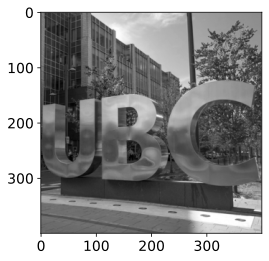

In [78]:
image = plt.imread('img/ubc.jpeg')[:, :, 0]
plt.imshow(image, cmap='gray')

Before applying the filter, let's take a look at the datatype and the number of strides for the `image` (which is saved as a NumPy array):

In [79]:
image.dtype

dtype('uint8')

In [80]:
image.strides

(1200, 3)

The unsigned integer datatype `unint8` should take up 1 byte per element. So you might probably expect to see `(400, 1)` for strides. What's happened? Why `(1200, 3)`?

The reason is when the image file is read using `plt.imread('img/ubc.jpeg')` it is originally strided as `(1200, 3, 1)` before slicing:

In [81]:
plt.imread('img/ubc.jpeg').strides

(1200, 3, 1)

This is because the image is 400x400, but since it is an RGB image, the array needs to store 400x400 values for each of the RGB colors, making the shape of the array `(400, 400, 3)`.

When we slice the array to pick one of the channels though (using `[:, :, 0]`), the original array in the memory does not change. This is why NumPy still has to traverse 1200 elements (instead of 400) to reach the next row and 3 elements to get to the next column. That's why we get `(1200, 3)` when we run `image.strides`!

The image below from [here](https://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays) nicely demonstrates how three dimensional arrays are stored in the memory in a **row-major** manner:

![](img/row-major-3D.png)

Phew! Back to our filtering task:

This is the filter I want to apply to the image:

In [82]:
f = np.array([[-2, -1, 0],
              [-1, 1, 1],
              [0, 1, 2]])

Now I'll use strides to view the image as 3 x 3 windows, so I can just apply the filter to every single window. Basically the goal here is to view our array as a series of 3x3 windows. So think of this as, for each pixel in our image, we want to view a 3x3 window around that pixel. We have 400x400 pixels, and if we have a 3x3 window for each pixel, we will have a 4D view of our array with shape `(400, 400, 3, 3)`. In this case, we can't have a 3x3 window at the edges of the image, so I'm just going to cut those off with our final shape being `(398, 398, 3, 3)` (but you could just pad the image with 0's to apply the filter at the edges if you wanted to). Once we have our 4D view, I can just apply the filter to each of those 3x3 windows and sum the numbers in each window. No `for` loops or complex functions needed!

Wall time taken for convolution: 0.0110s


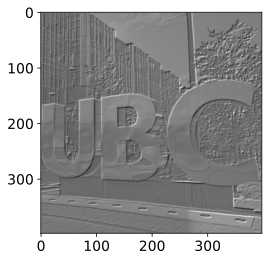

In [83]:
start = time.time()    # start time
size = f.shape[0]      # filter size
win_img = as_strided(  # Now use as_strided to get a windowed view of the array
    image,             # image to view as windows
    shape=(image.shape[0] - size + 1, image.shape[1] - size + 1, size, size),  # the shape of the new view (398, 398, 3, 3), the edge pixels are cut-off, but we could always pad if we wanted to here
    strides=image.strides * 2,  # this just duplicates the strides as we are now working in 4 dimensions, strides will be (1200, 3, 1200, 3)
)
filtered_image = (win_img * f).sum(axis=(2, 3))  # apply filter to each window (the 3rd and 4th dimensions of win_img)
plt.imshow(filtered_image, cmap="gray")
print(f"Wall time taken for convolution: {time.time()-start:.4f}s")

Even though `as_strided()` creates a new array, it uses the same data in memory as the original array. **The only thing that changes is the metadata, which changes how the array is viewed.**

If that example was a little too much for you right now, Jessica Yung provides a nice simple example of using arrays and strides in the blog post [What makes Numpy Arrays Fast: Memory and Strides](https://www.jessicayung.com/numpy-arrays-memory-and-strides/).